# ****Twitter Sentiment Analysis with BERT and RoBERTa****

The *Twitter Sentiment Analysis model* with *BERT* (Bidirectional Encoder Representations from Transformers) and *RoBERTa* (Robustly Optimized BERT Approach) is a powerful deep learning model designed to analyze sentiment in tweets. Leveraging the advanced natural language processing capabilities of BERT and RoBERTa, this model can accurately classify tweets into 0 and 1 sentiments.

Before feeding the data to the algorithms, *the tweets will be deeply cleaned to remove links, hashtags at the end of the sentences and punctuation* to allow the algorithms to better understand the text and improve the prediction performance.

# Importing the necessary packages



In [243]:
import numpy as np 
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import string 
import emoji
import nltk
from nltk import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.stem import SnowballStemmer
from imblearn.over_sampling import RandomOverSampler

from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

from keras import regularizers
from keras.layers import Embedding
from keras.models import Sequential
from keras import layers
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.initializers import RandomNormal

from transformers import BertTokenizerFast
from transformers import TFBertModel
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel

from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, log_loss
from sklearn.metrics import classification_report, confusion_matrix
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests
import gensim
import warnings
warnings.filterwarnings("ignore", category= DeprecationWarning)

%matplotlib inline

seed=42

In [3]:
#set style for plots
sns.set_style("whitegrid")
sns.despine()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlepad=10)

<Figure size 640x480 with 0 Axes>

# Reading the file

In [4]:
train = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')

train_original = train.copy()

In [5]:
# Overview of the training dataset
train.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [6]:
test = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/test.csv')

test_original = test.copy()

In [7]:
# Overview of the test dataset
test.head(10)

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
5,31968,choose to be :) #momtips
6,31969,something inside me dies ð¦ð¿â¨ eyes nes...
7,31970,#finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸...
8,31971,@user @user @user i will never understand why...
9,31972,#delicious #food #lovelife #capetown mannaep...


# Data Pre-Processing


In [8]:
# Combine train test files
combine = train.append(test, ignore_index = True, sort = True)

/tmp/ipykernel_32/2850696276.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combine = train.append(test, ignore_index = True, sort = True)


In [9]:
combine.tail()

,id,label,tweet
49154,49155,NaN,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...
49157,49158,NaN,"happy, at work conference: right mindset leads..."
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze ..."


In [10]:
combine.isnull().sum()

id           0
label    17197
tweet        0
dtype: int64

In [11]:
# Function to remove the pattern ‘@user’ from all the tweets

def remove_pattern(text, pattern):
    
    # re.findall() finds the pattern i.e @user and puts it in a list for further task
    r = re.findall(pattern, text)
    
    # re.sub() removes @user from the sentences in the dataset
    for i in r:
        
        text = re.sub(i, "", text)
        
    return text
    

In [12]:
# Vectoriztion 
combine['Tidy_Tweets'] = np.vectorize(remove_pattern)(combine['tweet'], "@[\w]*")

combine.head(10)

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ¦
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams.ð...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here ! i'm it's so #gr8 !


In [13]:
# Removing Punctuation, Numbers, and Special Characters
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].str.replace("[^a-zA-Z#]"," ")

combine.head(10)

/tmp/ipykernel_32/2335927539.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  combine['Tidy_Tweets'] = combine['Tidy_Tweets'].str.replace("[^a-zA-Z#]"," ")


,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams ...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here i m it s so #gr


In [14]:
# Removing Short Words
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))

combine.head(10)

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fare talking before they leave chaos disp...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,next school year year exams think about that #...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,love land #allin #cavs #champions #cleveland #...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here


In [15]:
# Tokenization
tokenized_tweet = combine['Tidy_Tweets'].apply(lambda x : x.split())

tokenized_tweet.head(10)

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
5    [huge, fare, talking, before, they, leave, cha...
6                           [camping, tomorrow, danny]
7    [next, school, year, year, exams, think, about...
8    [love, land, #allin, #cavs, #champions, #cleve...
9                                      [welcome, here]
Name: Tidy_Tweets, dtype: object

In [16]:
# Stemming
ps = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x : [ps.stem(i) for i in x])

tokenized_tweet.head(10)

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
5    [huge, fare, talk, befor, they, leav, chao, di...
6                              [camp, tomorrow, danni]
7    [next, school, year, year, exam, think, about,...
8    [love, land, #allin, #cav, #champion, #clevela...
9                                       [welcom, here]
Name: Tidy_Tweets, dtype: object

In [17]:
# Stiching these tokens back together
for i in range(len(tokenized_tweet)):
    
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
combine['Tidy_Tweets'] = tokenized_tweet
combine.head(10)

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fare talk befor they leav chao disput whe...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camp tomorrow danni
7,8,0.0,the next school year is the year for exams.ð...,next school year year exam think about that #s...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,love land #allin #cav #champion #cleveland #cl...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcom here


# Data Visualisation

In [18]:
# Generating WordCloud for tweets with label ‘0’.

all_words_positive = ' '.join(text for text in combine['Tidy_Tweets'][combine['label']==0])

In [19]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream = True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color = 'black', height = 1500, width = 4000, mask = Mask).generate(all_words_positive)

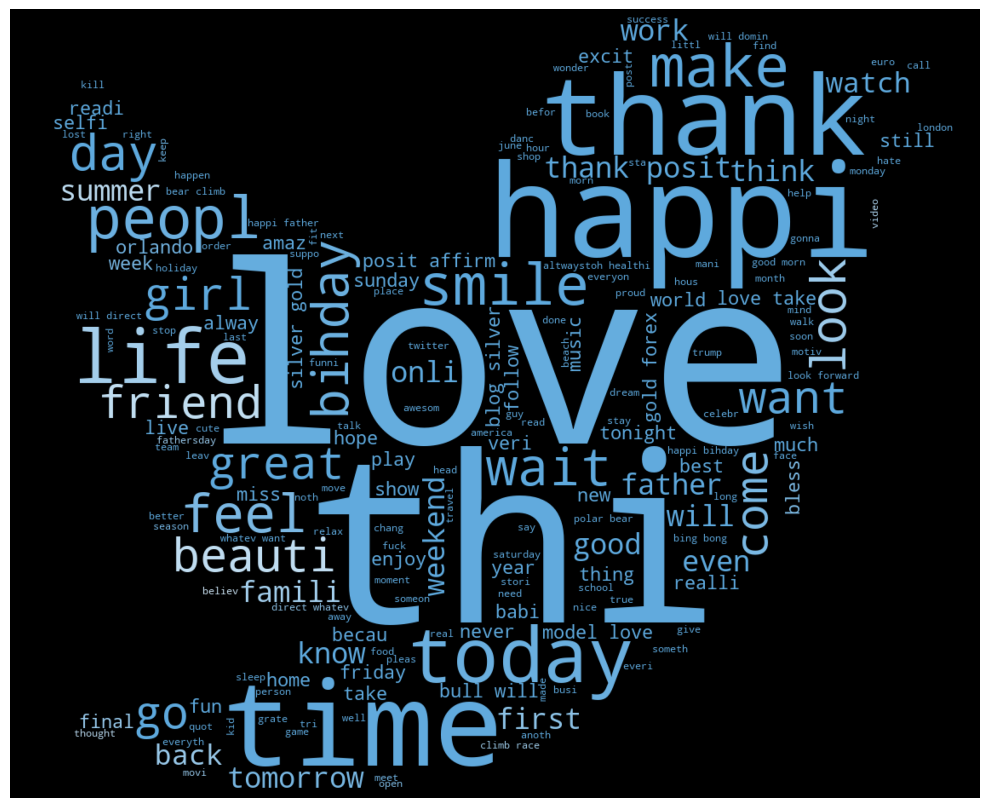

In [20]:
# Size of the image generated
plt.figure(figsize=(10, 20))

# Recolor the words from the dataset to the image's color
plt.imshow(wc.recolor(color_func = image_colors), interpolation = 'hamming')

plt.axis('off')
plt.show()

In [21]:
# Generating WordCloud for tweets with label ‘1‘.
all_words_positive = ' '.join(text for text in combine['Tidy_Tweets'][combine['label']==1])

In [22]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream = True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color = 'black', height = 1500, width = 4000, mask = Mask).generate(all_words_positive)

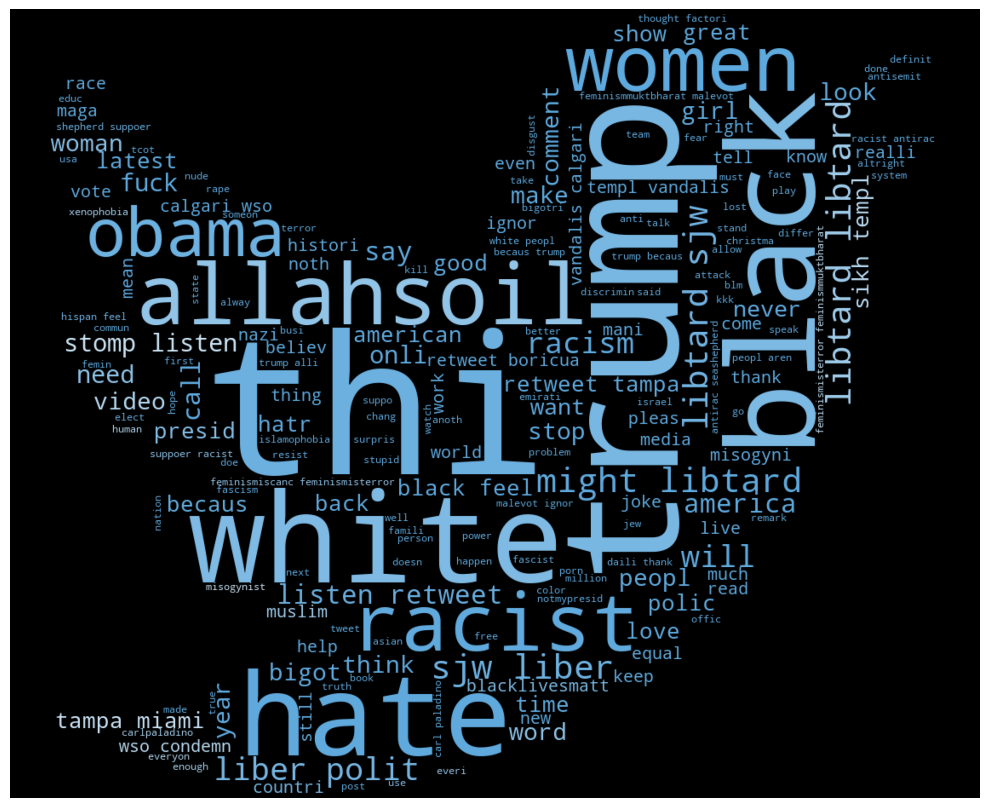

In [23]:
# Size of the image generated
plt.figure(figsize=(10, 20))

# Recolor the words from the dataset to the image's color
plt.imshow(wc.recolor(color_func = image_colors), interpolation = 'hamming')

plt.axis('off')
plt.show()

In [24]:
# Function to extract hashtags from tweets 

def hashtag_extracts(x):
    
    hashtags = []
    
    #Loop over words in tweet
    
    for i in x:
        ht = re.findall(r'#(\w+)', i)
        hashtags.append(ht)
        
    return hashtags

In [25]:
# A nested list of all the hashtags from the positive reviews from the dataset.

ht_positives = hashtag_extracts(combine['Tidy_Tweets'][combine['label'] == 0])


# Unnest the list

ht_positive_unnest = sum(ht_positives, [])

In [26]:
# A nested list of all the hashtags from the negative reviews from the dataset

ht_negetives = hashtag_extracts(combine['Tidy_Tweets'][combine['label'] == 1])


# Unnest the list

ht_negetive_unnest = sum(ht_negetives, [])


#  Plotting Bar-plots

In [27]:
# Counting the frequency of the words having Positive Sentiment

word_freq_positive = nltk.FreqDist(ht_positive_unnest)

word_freq_positive

FreqDist({'love': 1654, 'posit': 917, 'smile': 676, 'healthi': 573, 'thank': 534, 'fun': 463, 'life': 425, 'affirm': 423, 'summer': 390, 'model': 375, ...})

In [28]:
# Counting the frequency of the words having Negetive Sentiment

word_freq_negetive = nltk.FreqDist(ht_negetive_unnest)

word_freq_negetive

FreqDist({'trump': 136, 'polit': 95, 'allahsoil': 92, 'liber': 81, 'libtard': 77, 'sjw': 75, 'retweet': 63, 'black': 46, 'miami': 46, 'hate': 37, ...})

In [29]:
# Creating a dataframe for the most frequently used words in hashtags
df_positive = pd.DataFrame({'Hashtags':list(word_freq_positive.keys()),'Count':list(word_freq_positive.values())})

df_positive.head(10)

,Hashtags,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375
5,motiv,202
6,allshowandnogo,1
7,school,30
8,exam,9
9,hate,27


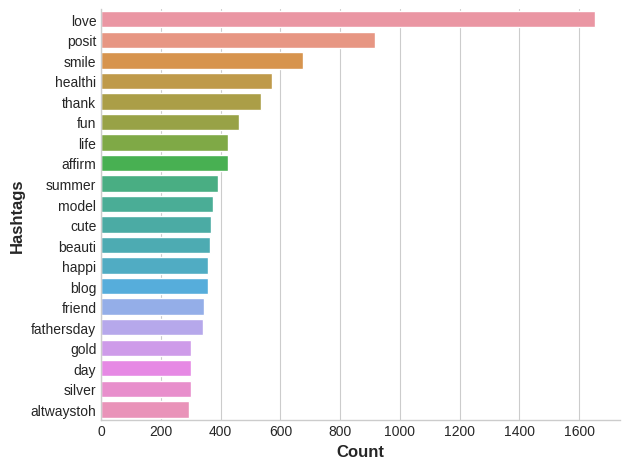

In [30]:
# Plotting the barplot for the 20 most frequent words used for hashtags
df_positive_plot = df_positive.nlargest(20,columns='Count')

sns.barplot(data=df_positive_plot,y='Hashtags',x='Count')
sns.despine()

In [31]:
# Creating a dataframe for the most frequently used words in hashtags
df_negetive = pd.DataFrame({'Hashtags':list(word_freq_negetive.keys()),'Count':list(word_freq_negetive.values())})

df_negetive.head(10)

,Hashtags,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5
5,seashepherd,22
6,helpcovedolphin,3
7,thecov,4
8,neverump,8
9,xenophobia,12


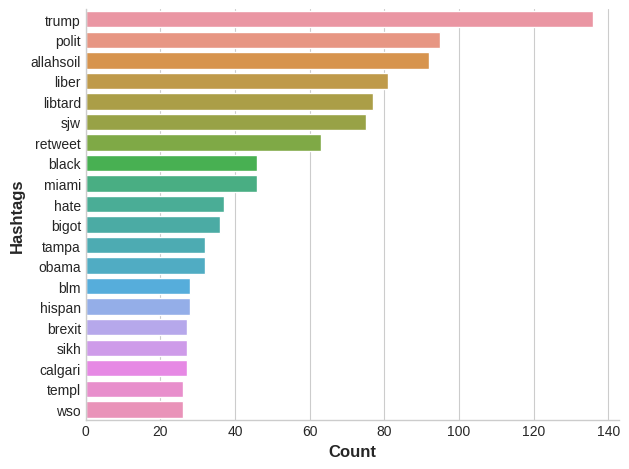

In [32]:
# Plotting the barplot for the 20 most frequent words used for hashtags

df_negetive_plot = df_negetive.nlargest(20,columns='Count')

sns.barplot(data=df_negetive_plot,y='Hashtags',x='Count')
sns.despine()

# Extracting Features from cleaned Tweets

> # 1.  Bag-of-Words Features

In [33]:
bow_vectorizer = CountVectorizer(max_df = 0.90, min_df = 2, max_features = 1000, stop_words = 'english')

# Bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combine['Tidy_Tweets'])

df_bow = pd.DataFrame(bow.todense())

df_bow.tail(10)


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
49149,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49150,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49151,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49153,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49158,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# Splitting our dataset into Training and Validation Set

train_bow = bow[:31962]

train_bow.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [35]:
x_train_bow, x_val_bow, y_train_bow, y_val_bow = train_test_split(train_bow, train['label'], test_size = 0.3, random_state = 2)


> > #  1.Logistic Regression 

In [36]:
Log_Reg = LogisticRegression(random_state=0,solver='lbfgs')

In [37]:
# Fitting the model
Log_Reg.fit(x_train_bow,y_train_bow)

LogisticRegression(random_state=0)

In [38]:
prediction_bow = Log_Reg.predict_proba(x_val_bow)

prediction_bow

array([[9.86501156e-01, 1.34988440e-02],
       [9.99599096e-01, 4.00904144e-04],
       [9.13577383e-01, 8.64226167e-02],
       ...,
       [8.95457155e-01, 1.04542845e-01],
       [9.59736065e-01, 4.02639345e-02],
       [9.67541420e-01, 3.24585797e-02]])

In [39]:
# Calculating F1 score
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
prediction_int = prediction_bow[:,1]>=0.3

# converting the results to integer type
prediction_int = prediction_int.astype(np.int)
prediction_int

# calculating f1 score
log_bow = f1_score(y_val_bow, prediction_int)

print('F1 score foe Logistic regression',log_bow)

F1 score foe Logistic regression 0.5721352019785655


> > #  2. XGBoost

In [40]:
model_bow = XGBClassifier(random_state=22,learning_rate=0.9)

In [41]:
# Fitting the model
model_bow.fit(x_train_bow, y_train_bow)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.9, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=22, ...)

In [42]:
xgb = model_bow.predict_proba(x_val_bow)

xgb


array([[9.9109417e-01, 8.9058345e-03],
       [9.9910688e-01, 8.9310389e-04],
       [9.2758572e-01, 7.2414286e-02],
       ...,
       [8.9067906e-01, 1.0932093e-01],
       [9.2758572e-01, 7.2414286e-02],
       [9.2758572e-01, 7.2414286e-02]], dtype=float32)

In [43]:
# Calculating F1 score
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
xgb=xgb[:,1]>=0.3

# converting the results to integer type
xgb_int=xgb.astype(np.int)

# calculating f1 score
xgb_bow=f1_score(y_val_bow,xgb_int)

print('F1 score for XGBoost :',xgb_bow)

F1 score for XGBoost : 0.5811023622047244


> > # 2. Decision Tree

In [44]:
dct = DecisionTreeClassifier(criterion='entropy', random_state=1)

In [45]:
# Fitting the model
dct.fit(x_train_bow,y_train_bow)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [46]:
dct_bow = dct.predict_proba(x_val_bow)

dct_bow

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [47]:
# Calculating F1 score
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
dct_bow=dct_bow[:,1]>=0.3

# converting the results to integer type
dct_int_bow=dct_bow.astype(np.int)

# calculating f1 score
dct_score_bow=f1_score(y_val_bow,dct_int_bow)

print('F1 score for Decision Tree :', dct_score_bow)

F1 score for Decision Tree : 0.5141776937618148


In [48]:
Algo_1 = ['LogisticRegression(Bag-of-Words)','XGBoost(Bag-of-Words)','DecisionTree(Bag-of-Words)']

score_1 = [log_bow,xgb_bow,dct_score_bow]

compare_1 = pd.DataFrame({'Model':Algo_1,'F1_Score':score_1},index=[i for i in range(1,4)])

compare_1.T

,1,2,3
Model,LogisticRegression(Bag-of-Words),XGBoost(Bag-of-Words),DecisionTree(Bag-of-Words)
F1_Score,0.572135,0.581102,0.514178


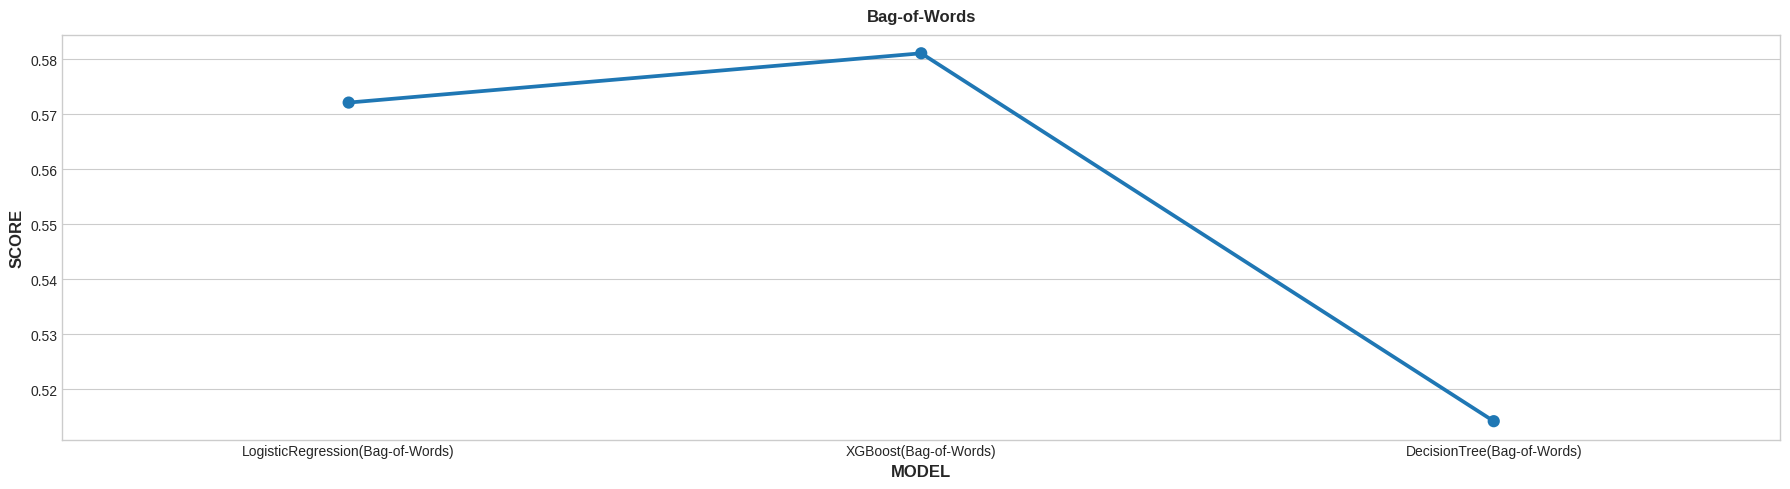

In [49]:
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='F1_Score',data=compare_1)

plt.title('Bag-of-Words')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()

> # 2. TF-IDF Features

In [50]:
tfidf = TfidfVectorizer(max_df = 0.90, min_df = 2, max_features = 1000, stop_words = 'english')

tfidf_matrix = tfidf.fit_transform(combine['Tidy_Tweets'])

df_tfidf = pd.DataFrame(tfidf_matrix.todense())

df_tfidf.head(10)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.403826,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
train_tfidf_matrix = tfidf_matrix[:31962]

train_tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [52]:
x_train_tfidf, x_val_tfidf, y_train_tfidf, y_val_tfidf = train_test_split(train_tfidf_matrix,train['label'],test_size=0.3,random_state=17)

> > # 1. Logistic Regression

In [53]:
Log_Reg.fit(x_train_tfidf,y_train_tfidf)

LogisticRegression(random_state=0)

In [54]:
prediction_tfidf = Log_Reg.predict_proba(x_val_tfidf)

prediction_tfidf

array([[0.98487907, 0.01512093],
       [0.97949889, 0.02050111],
       [0.9419737 , 0.0580263 ],
       ...,
       [0.98630906, 0.01369094],
       [0.96746188, 0.03253812],
       [0.99055287, 0.00944713]])

In [55]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
prediction_int = prediction_tfidf[:,1]>=0.3

prediction_int = prediction_int.astype(np.int)
prediction_int

# calculating f1 score
log_tfidf = f1_score(y_val_tfidf, prediction_int)

log_tfidf

0.5862068965517241

> # 2. XGBoost

In [56]:
model_tfidf = XGBClassifier(random_state=29,learning_rate=0.7)

In [57]:
model_tfidf.fit(x_train_tfidf, y_train_tfidf)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.7, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=29, ...)

In [58]:
xgb_tfidf=model_tfidf.predict_proba(x_val_tfidf)

xgb_tfidf

array([[0.9958908 , 0.00410918],
       [0.9872918 , 0.01270822],
       [0.9527768 , 0.04722321],
       ...,
       [0.99192214, 0.00807783],
       [0.9852176 , 0.01478244],
       [0.9974108 , 0.0025892 ]], dtype=float32)

In [59]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
xgb_tfidf=xgb_tfidf[:,1]>=0.3

# converting the results to integer type
xgb_int_tfidf=xgb_tfidf.astype(np.int)

# calculating f1 score
score=f1_score(y_val_tfidf,xgb_int_tfidf)

score

0.5792

> > # 3. Decision tree

In [60]:
dct = DecisionTreeClassifier(criterion='entropy', random_state=1)

In [61]:
dct.fit(x_train_tfidf,y_train_tfidf)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [62]:
dct_tfidf = dct.predict_proba(x_val_tfidf)

dct_tfidf

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [63]:

# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
dct_tfidf=dct_tfidf[:,1]>=0.3

# converting the results to integer type
dct_int_tfidf=dct_tfidf.astype(np.int)

# calculating f1 score
dct_score_tfidf=f1_score(y_val_tfidf,dct_int_tfidf)

dct_score_tfidf

0.5498821681068342

In [64]:
Algo_2 = ['LogisticRegression(TF-IDF)','XGBoost(TF-IDF)','DecisionTree(TF-IDF)']

score_2 = [log_tfidf,score,dct_score_tfidf]

compare_2 = pd.DataFrame({'Model':Algo_2,'F1_Score':score_2},index=[i for i in range(1,4)])

compare_2.T

,1,2,3
Model,LogisticRegression(TF-IDF),XGBoost(TF-IDF),DecisionTree(TF-IDF)
F1_Score,0.586207,0.5792,0.549882


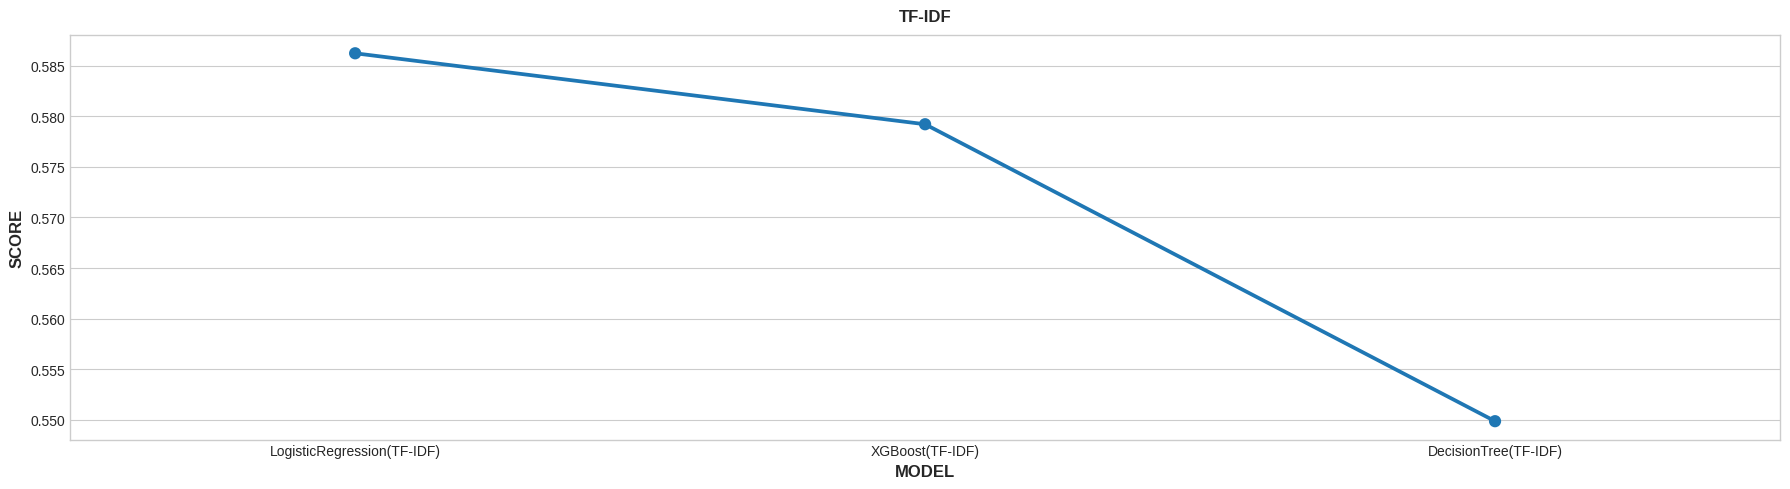

In [65]:

plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='F1_Score',data=compare_2)

plt.title('TF-IDF')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()

In [66]:

Algo_best = ['LogisticRegression(Bag-of-Words)','LogisticRegression(TF-IDF)']

score_best = [log_bow,log_tfidf]

compare_best = pd.DataFrame({'Model':Algo_best,'F1_Score':score_best},index=[i for i in range(1,3)])

compare_best.T

,1,2
Model,LogisticRegression(Bag-of-Words),LogisticRegression(TF-IDF)
F1_Score,0.572135,0.586207


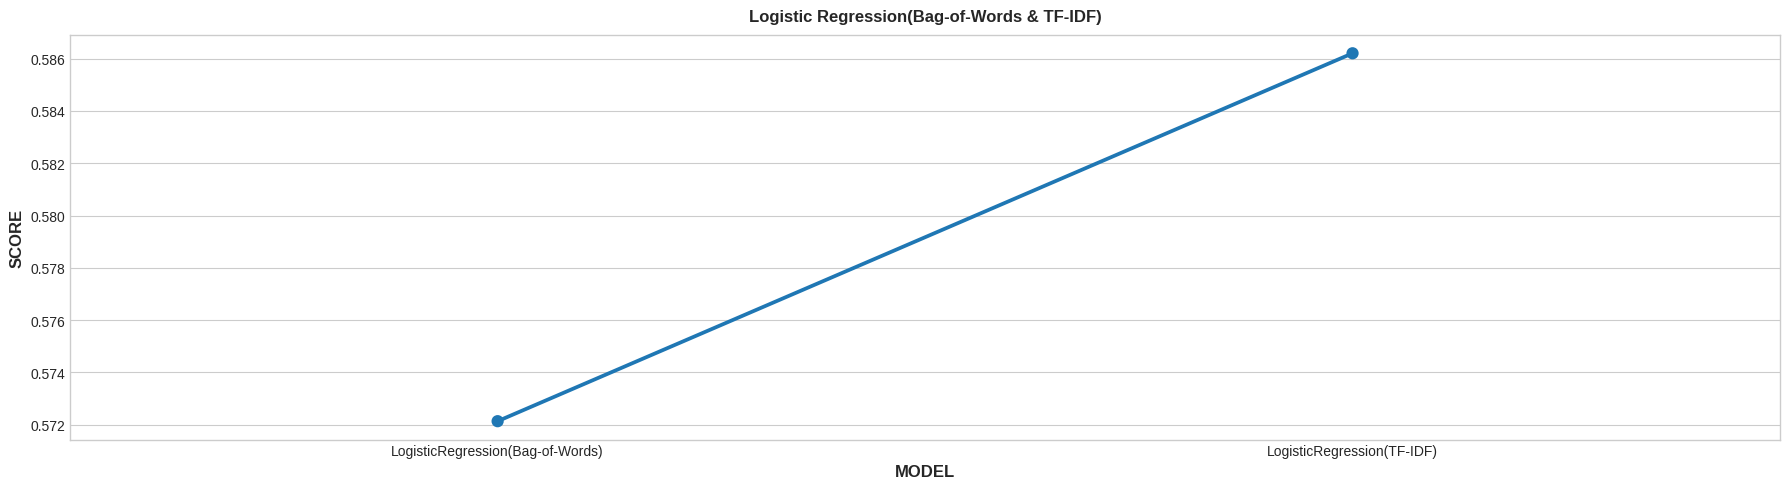

In [67]:
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='F1_Score',data=compare_best)

plt.title('Logistic Regression(Bag-of-Words & TF-IDF)')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()

In [68]:
test_tfidf = tfidf_matrix[31962:]
test_pred = Log_Reg.predict_proba(test_tfidf)

test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)

test['label'] = test_pred_int

submission = test[['id','label']]
submission.to_csv('result.csv', index=False)

In [69]:
res = pd.read_csv('result.csv')
res.head(10)

,id,label
0,31963,0
1,31964,0
2,31965,0
3,31966,0
4,31967,0
5,31968,0
6,31969,0
7,31970,0
8,31971,0
9,31972,0


In [70]:
df = pd.read_csv('/kaggle/input/twitter-sentiment-analysis-hatred-speech/train.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


> > # 4. Recurrent Neural Network

In [220]:
df = pd.read_csv('/kaggle/input/twitter-sentiment-analysis-hatred-speech/train.csv')

In [221]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [222]:
# Fetching stopwords
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [223]:
stemmer = SnowballStemmer('english')

In [224]:

text_cleaning_regex = "@S+|https?:S+|http?:S|[^A-Za-z0-9]+"

In [225]:
def clean_tweets(text, stem=False):
  
    text = re.sub(text_cleaning_regex, ' ', str(text).lower()).strip()
  
    tokens = []
    for token in text.split():
    
        if token not in stop_words:
            if stem:
        
                tokens.append(stemmer.stem(token))
            else:
        
                tokens.append(token)
    return " ".join(tokens)

In [226]:
df.tweet = df.tweet.apply(lambda x: clean_tweets(x))

In [227]:
df

,id,label,tweet
0,1,0,user father dysfunctional selfish drags kids d...
1,2,0,user user thanks lyft credit use cause offer w...
2,3,0,bihday majesty
3,4,0,model love u take u time ur
4,5,0,factsguide society motivation
...,...,...,...
31957,31958,0,ate user isz youuu
31958,31959,0,see nina turner airwaves trying wrap mantle ge...
31959,31960,0,listening sad songs monday morning otw work sad
31960,31961,1,user sikh temple vandalised calgary wso condem...


In [228]:
train_data, test_data = train_test_split(df, test_size=0.2,random_state=16)

In [229]:
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 25569
Test Data size 6393


In [230]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()

In [231]:
tokenizer.fit_on_texts(train_data.tweet)
word_index = tokenizer.word_index


In [232]:
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 33872


In [233]:

# The tokens are converted into sequences and then passed to the pad_sequences() function
X_train = pad_sequences(tokenizer.texts_to_sequences(train_data.tweet),maxlen = 30)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data.tweet),maxlen = 30)

In [234]:
y_train = train_data.label.values
y_test = test_data.label.values
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [235]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(25569, 30)
(6393, 30)
(25569, 1)
(6393, 1)


In [236]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
--2023-07-02 15:03:45--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cs.stanford.edu/srcf_404 [following]
--2023-07-02 15:03:45--  https://cs.stanford.edu/srcf_404
Resolving cs.stanford.edu (cs.stanford.edu)... 171.64.64.64
Connecting to cs.stanford.edu (cs.stanford.edu)|171.64.64.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘glove.6B.zip.1’

glove.6B.zip.1          [ <=>                ]  39.77

In [237]:
embeddings_index = {}
f = open('/kaggle/input/nlp-preprocessing-feature-extraction-methods-a-z/glove.6B.100d.txt.word2vec')
for line in f:
    values = line.split()
    word = value = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
    
f.close()
print('Found %s word vectors.' %len(embeddings_index))

Found 400001 word vectors.


In [238]:
# creating an matrix with zeroes of shape vocab x embedding dimension
embedding_matrix = np.zeros((vocab_size, 300))

# Iterate through word, index in the dictionary
for word, i in word_index.items():
    # extract the corresponding vector for the vocab indice of same word
    embedding_vector = embeddings_index.get(word)
    
    if embedding_vector is not None:
        # Storing it in a matrix
        embedding_matrix[i] = embedding_vector
    


In [239]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,300,weights=[embedding_matrix],
                                          input_length=30,trainable=False)

In [240]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

In [241]:
# The Input layer 
sequence_input = Input(shape=(30,), dtype='int32')

# Inputs passed to the embedding layer
embedding_sequences = embedding_layer(sequence_input)

# dropout and conv layer 
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)

# Passed on to the LSTM layer
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)

# Passed on to activation layer to get final output
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

In [244]:
LR = 0.001

model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',metrics=['accuracy'])

ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,min_lr = 0.01, monitor = 'val_loss',verbose = 1)

In [245]:
training = model.fit(X_train, y_train, batch_size=1024, epochs=20,
                    validation_data=(X_test, y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/20
25/25 [==============================] - 24s 681ms/step - loss: 0.2984 - accuracy: 0.9013 - val_loss: 0.2142 - val_accuracy: 0.9271 - lr: 0.0010
Epoch 2/20
25/25 [==============================] - 16s 641ms/step - loss: 0.1741 - accuracy: 0.9330 - val_loss: 0.1761 - val_accuracy: 0.9363 - lr: 0.0010
Epoch 3/20
25/25 [==============================] - 16s 651ms/step - loss: 0.1504 - accuracy: 0.9451 - val_loss: 0.1586 - val_accuracy: 0.9443 - lr: 0.0010
Epoch 4/20
25/25 [==============================] - 16s 639ms/step - loss: 0.1324 - accuracy: 0.9508 - val_loss: 0.1475 - val_accuracy: 0.9496 - lr: 0.0010
Epoch 5/20
25/25 [==============================] - 16s 657ms/step - loss: 0.1212 - accuracy: 0.9554 - val_loss: 0.1427 - val_accuracy: 0.9503 - lr: 0.0010
Epoch 6/20
25/25 [==============================] - 16s 637ms/step - loss: 0.1009 - accuracy: 0.9632 - val_loss: 0.1404 - val_accuracy: 0.9509 - lr: 0.0010
Epoch 7/20
25/25 [==============================] - 16s 654ms/st

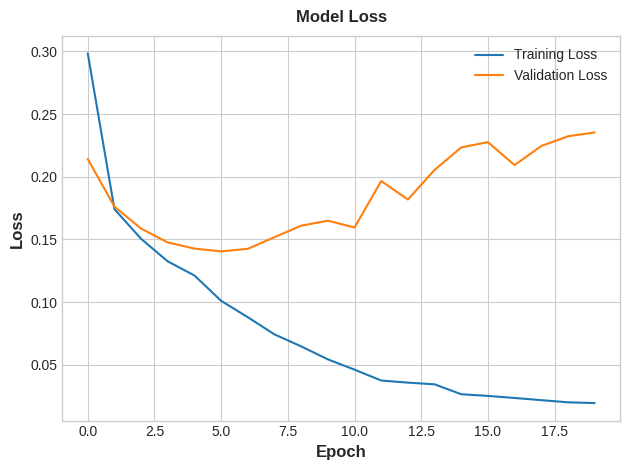

In [246]:
# Extracting loss and validation loss from training object
loss = training.history['loss']
val_loss = training.history['val_loss']

# Plotting loss vs val_loss
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [96]:
def predict_tweet_sentiment(score):
    return "Positive" if score>0.5 else "Negative"
scores = model.predict(X_test, verbose=1, batch_size=10000)
model_predictions = [predict_tweet_sentiment(score) for score in scores]

1/1 [==============================] - 1s 1s/step


In [97]:
# Convert labels to string type
y_true = list(map(str, test_data.label))
y_pred = list(map(str, model_predictions))

# Generate classification report
report = classification_report(y_true, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00    5927.0
           1       0.00      0.00      0.00     466.0
    Negative       0.00      0.00      0.00       0.0
    Positive       0.00      0.00      0.00       0.0

    accuracy                           0.00    6393.0
   macro avg       0.00      0.00      0.00    6393.0
weighted avg       0.00      0.00      0.00    6393.0



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.

> > # 5. BERT

In [98]:
#loading the data
df1 = pd.read_csv('/kaggle/input/twitter-sentiment-analysis-hatred-speech/train.csv')

In [99]:
df1.shape

(31962, 3)

In [100]:
#preview the data
df1.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [101]:
# Splitting data in tain and test set
df, df_test = train_test_split(df1, test_size=0.3, random_state=42)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22373 entries, 9635 to 23654
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      22373 non-null  int64 
 1   label   22373 non-null  int64 
 2   tweet   22373 non-null  object
dtypes: int64(2), object(1)
memory usage: 699.2+ KB


In [103]:
#Extracting tweet and label column
df = df[['tweet','label']]

In [104]:
df.head()

,tweet,label
9635,summer timeð #summeriscoming #swimming #pic...,0
2447,"dese niggas will show dese otha bitches on fb,...",0
16134,"""when you are you boost your immune system a...",0
18393,reading my manuscript and not wanting to stop....,0
4420,baby says he hates me today,0


> > > # 5 a] Tweets Deep Cleaning

In [105]:
# Function to remove emojis
def strip_emoji(text):
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "\U00002500-\U00002BEF"  # Chinese characters
        "\U00002702-\U000027B0"
        "\U00002702-\U000027B0"
        "\U000024C2-\U0001F251"
        "\U0001f926-\U0001f937"
        "\U00010000-\U0010ffff"
        "\u200d"  # zero width joiner
        "\u200c"  # zero width non-joiner
        "]+",
        flags=re.UNICODE,
    )
    return emoji_pattern.sub(r"", text)


In [106]:
#Remove punctuations, links, mentions and \r\n new line characters
def strip_all_entities(text): 
    text = text.replace('\r', '').replace('\n', ' ').replace('\n', ' ').lower() #remove \n and \r and lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #remove links and mentions
    text = re.sub(r'[^\x00-\x7f]',r'', text) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    banned_list= string.punctuation + 'Ã'+'±'+'ã'+'¼'+'â'+'»'+'§'
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    return text



In [107]:
#clean hashtags at the end of the sentence, and keep those in the middle of the sentence by removing just the # symbol
def clean_hashtags(tweet):
    new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet)) #remove last hashtags
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet)) #remove hashtags symbol from words in the middle of the sentence
    return new_tweet2

In [108]:
#Filter special characters such as & and $ present in some words
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

In [109]:
# remove multiple spaces
def remove_mult_spaces(text): 
    return re.sub("\s\s+" , " ", text)

In [110]:
# Cleaning training data
texts_new = []
for t in df.tweet:
    texts_new.append(remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(strip_emoji(t))))))

#Creating new column for cleaned tweets
df['cleaned_tweets'] = texts_new

In [111]:
#Cleaning testing data
texts_new_test = []
for t in df_test.tweet:
    texts_new_test.append(remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(strip_emoji(t))))))
    
#Creating new column for cleaned tweets
df_test['cleaned_tweets'] = texts_new_test

In [112]:
df.head()

,tweet,label,cleaned_tweets
9635,summer timeð #summeriscoming #swimming #pic...,0,summer time summeriscoming swimming picoftheda...
2447,"dese niggas will show dese otha bitches on fb,...",0,dese niggas will show dese otha bitches on fb ...
16134,"""when you are you boost your immune system a...",0,when you are you boost your immune system and ...
18393,reading my manuscript and not wanting to stop....,0,reading my manuscript and not wanting to stop ...
4420,baby says he hates me today,0,baby says he hates me today


In [113]:
df_test.head()

,id,label,tweet,cleaned_tweets
12227,12228,0,@user âmy mom says my smile is captivatingâ...,my mom says my smile is captivating i says hap...
14709,14710,0,"in 3 days i will be meeting my sis-n-law, coun...",in 3 days i will be meeting my sisnlaw couney ...
19319,19320,0,hating the conservative homophobes using this ...,hating the conservative homophobes using this ...
4308,4309,0,awee if this doesn't #scream #friday #acewe...,awee if this doesnt scream friday acewellstuck...
24055,24056,0,fathersday #fatherÃ¢ÂÂs #day #god! #ÃÂ« #...,fathersday fathers day god tony a smith buy th...


In [114]:
#Creating a column to host length of cleaned text
text_len = []
for text in df.cleaned_tweets:
    tweet_len = len(text.split())
    text_len.append(tweet_len)
    

df['tweet_len'] = text_len

In [115]:
#Creating a column to host length of cleaned text
text_len_test = []
for text in df_test.cleaned_tweets:
    tweet_len = len(text.split())
    text_len_test.append(tweet_len)
    

df_test['text_len'] = text_len_test

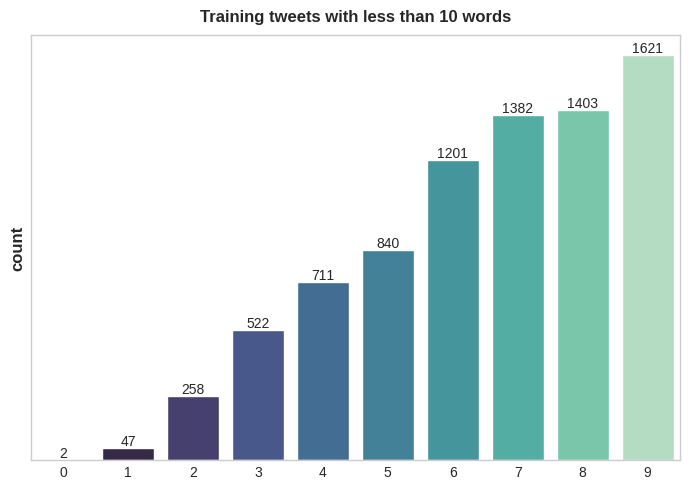

In [116]:
#Plotting length vs number of tweets
plt.figure(figsize=(7,5))
ax = sns.countplot(x='tweet_len', data=df[df['tweet_len']<10], palette='mako')
plt.title('Training tweets with less than 10 words')
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

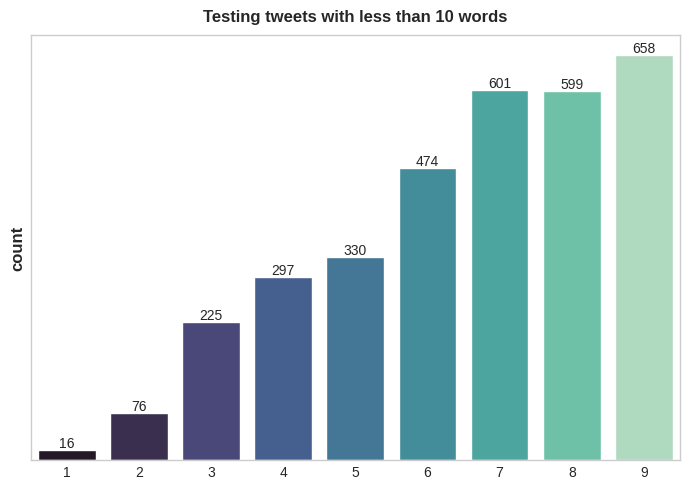

In [117]:
#Plotting length vs number of tweets
plt.figure(figsize=(7,5))
ax = sns.countplot(x='text_len', data=df_test[df_test['text_len']<10], palette='mako')
plt.title('Testing tweets with less than 10 words')
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

As we can see, there are lots of cleaned tweets with 0 words: this is due to the cleaning performed before. This means that some tweets contained only mentions, hashtags and links, which have been removed. We will drop these empty tweets and also those with less than 2 words.

In [118]:
df

,tweet,label,cleaned_tweets,tweet_len
9635,summer timeð #summeriscoming #swimming #pic...,0,summer time summeriscoming swimming picoftheda...,9
2447,"dese niggas will show dese otha bitches on fb,...",0,dese niggas will show dese otha bitches on fb ...,22
16134,"""when you are you boost your immune system a...",0,when you are you boost your immune system and ...,17
18393,reading my manuscript and not wanting to stop....,0,reading my manuscript and not wanting to stop ...,13
4420,baby says he hates me today,0,baby says he hates me today,6
...,...,...,...,...
29802,#waltdisneyreso should be ashamed of themselv...,0,waltdisneyreso should be ashamed of themselves...,19
5390,@user invited @user over for a catch up and i...,0,invited over for a catch up and i couldnt stop...,21
860,black professor makes assumptions about an ent...,1,black professor makes assumptions about an ent...,17
15795,#lgbtqhatetrumppay is total #liberal trash. it...,0,lgbtqhatetrumppay is total liberal trash its a...,12


In [119]:
print(f" DF SHAPE: {df.shape}")
print(f" DF TEST SHAPE: {df_test.shape}")

 DF SHAPE: (22373, 4)
 DF TEST SHAPE: (9589, 5)


In [120]:
df = df[df['tweet_len'] > 2]

In [121]:
df_test = df_test[df_test['text_len'] > 2]

In [122]:
df.shape

(22066, 4)

> > > # 5 b] Training data deeper cleaning

Let's perform a further cleaning checking the tokenizer version of the sentences.

First, we import the BERT tokenizer.

In [123]:
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

In [124]:
token_lens = []

for txt in df['cleaned_tweets'].values:
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))
    
max_len=np.max(token_lens)

In [125]:
print(f"MAX TOKENIZED SENTENCE LENGTH: {max_len}")

MAX TOKENIZED SENTENCE LENGTH: 42


Let's check the long tokenized sentences (with more than 42 tokens ):

In [126]:
token_lens = []

for i,txt in enumerate(df['cleaned_tweets'].values):
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))
    if len(tokens)>42:
        print(f"INDEX: {i}, TEXT: {txt}")  

In [127]:
df['token_lens'] = token_lens

/tmp/ipykernel_32/4033353064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['token_lens'] = token_lens


In [128]:
df = df.sort_values(by = 'token_lens', ascending = False)
df.head(20)

,tweet,label,cleaned_tweets,tweet_len,token_lens
7201,everyone's talking about the #yeezyboost750 an...,0,everyones talking about the yeezyboost750 and ...,15,42
18958,epic video: blm zombie vs. trump kids youcana...,0,epic video blm zombie vs trump kids youcanalwa...,8,42
2198,father's day # i m really vry lucky to hav u...,0,fathers day i m really vry lucky to hav u as m...,29,41
9858,@user 50%#islamic-info 25%#cricket 10%#all-ty...,0,50islamicinfo 25cricket 10alltypespos 10 poetr...,16,41
20047,ready to live this day as the last day of my l...,0,ready to live this day as the last day of my l...,20,40
21751,50%#islamic-info 25%#cricket 10%#all-type-spos...,0,50islamicinfo 25cricket 10alltypespos 10 poetr...,16,40
22884,sagarika hw mch mony u gt 4 stkng 2 anti modi ...,0,sagarika hw mch mony u gt 4 stkng 2 anti modi ...,24,40
29877,i hate life i hate work i hate myself #vodka...,0,i hate life i hate work i hate myself vodkadep...,16,39
17614,hmmm!amodu's dead?woke up again dis mornin 2he...,0,hmmmamodus deadwoke up again dis mornin 2hear ...,22,39
11301,@user 50%#islamic-info 20%#cricket 10%#all-ty...,0,50islamicinfo 20cricket 10alltypespos 10 poetr...,16,39


In [129]:
df = df.sample(frac=1).reset_index(drop=True)

In [130]:
df

,tweet,label,cleaned_tweets,tweet_len,token_lens
0,#maigiveaway i've always wanted a tapestry ð...,0,maigiveaway ive always wanted a tapestry,6,12
1,â gold errythang #gold 5.20.16 @ baltimor...,0,gold errythang gold 52016 baltimore maryland,6,12
2,@user smile with my #dog. #dogsarejoypic.tw...,0,smile with my dog dogsarejoypictwittercomdn49q...,5,22
3,ð @user @user own team up with #new #mc @u...,1,own team up with new mc amp show what phillysu...,12,20
4,happy baby ð¶ðâ¤ï¸ #baby #babyboy #cu...,0,happy baby baby babyboy cute cake chocolate si...,9,14
...,...,...,...,...,...
22061,"@user yeah, she'll be elected right after jil...",0,yeah shell be elected right after jill stein a...,18,22
22062,oh yeah it's literally wverything when @user a...,0,oh yeah its literally wverything when acknowle...,12,23
22063,it looks like battlefield prep for the next el...,0,it looks like battlefield prep for the next el...,14,16
22064,"""happy people schedule regular exercise and fo...",0,happy people schedule regular exercise and fol...,21,25


> > > # 5 c] Test data deeper cleaning

We will perform the data cleaning based on the tokenized sentences on the test set.

In [131]:
token_lens_test = []

for txt in df_test['cleaned_tweets'].values:
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens_test.append(len(tokens))
    
max_len=np.max(token_lens_test)

In [132]:
print(f"MAX TOKENIZED SENTENCE LENGTH: {max_len}")

MAX TOKENIZED SENTENCE LENGTH: 44


In [133]:
token_lens_test = []

for i,txt in enumerate(df_test['cleaned_tweets'].values):
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens_test.append(len(tokens))
    if len(tokens)>42:
        print(f"INDEX: {i}, TEXT: {txt}")

INDEX: 3414, TEXT: gtgtgtgtgtgtgtgtgtgtgtgtgtgtgtgtgtgtgtgtgtgtgtgtgtgtgtgtgtgtgtgtgtgtgtgt bihday to you 33


In [134]:
df_test['token_lens'] = token_lens_test

In [135]:
df_test = df_test.sort_values(by='token_lens', ascending=False)
df_test.head(10) 

,id,label,tweet,cleaned_tweets,text_len,token_lens
31485,31486,0,&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&g...,gtgtgtgtgtgtgtgtgtgtgtgtgtgtgtgtgtgtgtgtgtgtgt...,5,44
8821,8822,0,"so like true or false, stephen keshi die na wa...",so like true or false stephen keshi die na wao...,27,42
8054,8055,0,mrrat395: #phantomfriday cptplanespotter bl...,mrrat395 phantomfriday cptplanespotter blackma...,9,41
20402,20403,0,#udtapunjab is havin #udtatroubles tht r flyin...,udtapunjab is havin udtatroubles tht r flying ...,17,40
23556,23557,0,@user fuuuuuuuuuuuuuuuuuuuckk! thats an amazin...,fuuuuuuuuuuuuuuuuuuuckk thats an amazing line ...,12,40
6594,6595,0,"off to bracebridge, huntsville to look at more...",off to bracebridge huntsville to look at more ...,10,39
2020,2021,0,"realized today i'm one of the ""adults"" now sin...",realized today im one of the adults now since ...,24,38
2638,2639,1,@user if i cud this 1000x i wud. #blackonblac...,if i cud this 1000x i wud blackonblack ris2016...,13,38
11326,11327,0,@user how biased n unfair wr #goldawards aarya...,how biased n unfair wr goldawards aarya babbar...,25,37
17799,17800,0,it may b 4am but i have a very happy smiley ba...,it may b 4am but i have a very happy smiley ba...,26,37


This sentences are not in english. It should be dropped.

In [136]:
df_test = df_test.iloc[1:]
df_test.head(3)

,id,label,tweet,cleaned_tweets,text_len,token_lens
8821,8822,0,"so like true or false, stephen keshi die na wa...",so like true or false stephen keshi die na wao...,27,42
8054,8055,0,mrrat395: #phantomfriday cptplanespotter bl...,mrrat395 phantomfriday cptplanespotter blackma...,9,41
20402,20403,0,#udtapunjab is havin #udtatroubles tht r flyin...,udtapunjab is havin udtatroubles tht r flying ...,17,40


The dataset looks more clean now. We will shuffle it and reset the index.

In [137]:
df_test = df_test.sample(frac=1).reset_index(drop=True)

In [138]:
df_test

,id,label,tweet,cleaned_tweets,text_len,token_lens
0,5941,0,"@user don't fit in, #beyourself and #standout...",dont fit in beyourself and standout youre amaz...,14,22
1,26982,0,get #up get get #enjoy #music #today #free ...,get up get get enjoy music today free apps fre...,11,13
2,25496,0,officers salute last known 9/11 search dog as ...,officers salute last known 911 search dog as s...,19,23
3,28853,0,a little polski sklep is good for you and me! ...,a little polski sklep is good for you and me a...,13,22
4,29660,0,#mybob #globetrotter #a #peterkogler #next #us...,mybob globetrotter a peterkogler next useyourh...,10,24
...,...,...,...,...,...,...
9491,12396,0,now i fear for my fave aists. hoping they'd be...,now i fear for my fave aists hoping theyd be s...,13,19
9492,10903,0,first news you see in the morning #orlandoshoo...,first news you see in the morning orlandoshooting,8,12
9493,18630,1,are you #black &amp; feel like the are stompi...,are you black amp feel like the are stomping o...,14,21
9494,9153,0,happy friyay! ðð»ð¶ð¦ #friyay #tgif...,happy friyay friyay tgif weinerdog waterdog cu...,8,26


> > > # 5 d] Sentiment column analysis

In [139]:
df['label'].value_counts()

0    20516
1     1550
Name: label, dtype: int64

> > > # 5 e] Class Balancing by RandomOverSampler

Oversampling the train test, to remove bias towards the majority classes.

In [140]:
ros = RandomOverSampler()
train_x, train_y = ros.fit_resample(np.array(df['cleaned_tweets']).reshape(-1, 1), np.array(df['label']).reshape(-1, 1));

#Oversampled data
train_os = pd.DataFrame(list(zip([x[0] for x in train_x], train_y)), columns = ['cleaned_tweets', 'label']);

In [141]:
train_x.shape

(41032, 1)

In [142]:
train_os

,cleaned_tweets,label
0,maigiveaway ive always wanted a tapestry,0
1,gold errythang gold 52016 baltimore maryland,0
2,smile with my dog dogsarejoypictwittercomdn49q...,0
3,own team up with new mc amp show what phillysu...,1
4,happy baby baby babyboy cute cake chocolate si...,0
...,...,...
41027,nowe can see they have been instrumental in pr...,1
41028,are black amp feel like the are stomping on yo...,1
41029,this stupid idea that trump is a fascist and a...,1
41030,the lady said its the juniors only area it was...,1


In [143]:
train_os['cleaned_tweets'].unique().shape

(20031,)

In [144]:
train_os['label'].value_counts()

0    20516
1    20516
Name: label, dtype: int64

> > > # 5 f] Train - Validation - Test split

In [145]:
X = train_os['cleaned_tweets'].values
y = train_os['label'].values

In [146]:
y.shape

(41032,)

A validation set will be extracted from the training set to monitor the validation accuracy, and so prevent overfitting.

In [147]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, stratify=y, random_state=seed)

In [148]:
X_train.shape

(36928,)

In [149]:
X_test = df_test['cleaned_tweets'].values
y_test = df_test['label'].values

In [150]:
X_test.shape

(9496,)

In [151]:
y_test.shape

(9496,)

In [152]:
y_test

array([0, 0, 0, ..., 1, 0, 0])

> > > # 5 g] One hot encoding

After performing some tests, by using one hot encoding on the target variable we achieved higher accuracy. For this reason we will choose one hot enconding over label encoding.
EDIT: We will save a copy of the label encoded target columns since they could be useful for further analysis.

In [153]:
y_train_le = y_train.copy()
y_valid_le = y_valid.copy()
y_test_le = y_test.copy()

In [154]:
y_train

array([0, 1, 0, ..., 1, 0, 1])

In [155]:
ohe = preprocessing.OneHotEncoder()
y_train_encoded = ohe.fit_transform(y_train.reshape(-1, 1)).toarray()
y_valid_encoded = ohe.transform(y_valid.reshape(-1, 1)).toarray()
y_test_encoded = ohe.transform(y_test.reshape(-1, 1)).toarray()


In [156]:
y_train_encoded

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [157]:
y_train.shape

(36928,)

In [158]:
y_test.shape

(9496,)

In [178]:
y_test

array([0, 0, 0, ..., 1, 0, 0])

In [159]:
y_valid.shape

(4104,)

In [160]:
# Printing shape of train data, validation data, test data
print(f"TRAINING DATA: {X_train.shape[0]}\nVALIDATION DATA: {X_valid.shape[0]}\nTESTING DATA: {X_test.shape[0]}" )

TRAINING DATA: 36928
VALIDATION DATA: 4104
TESTING DATA: 9496


> > > # 5 h] BERT Sentiment Analysis

Now, we will define a custom tokenizer function and call the encode_plus method of the BERT tokenizer.

In [161]:
MAX_LEN = 64

In [162]:
# Function to tokenize tweets
def tokenize(data,max_len=MAX_LEN) :
    input_ids = []
    attention_masks = []
    for i in range(len(data)):
        encoded = tokenizer.encode_plus(
            data[i],
            add_special_tokens=True,
            max_length=MAX_LEN,
            padding='max_length',
            return_attention_mask=True
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids),np.array(attention_masks)

Then, we apply the tokenizer function to the train, validation and test sets.

In [163]:
# Applying tokenizer function
train_input_ids, train_attention_masks = tokenize(X_train, MAX_LEN)
val_input_ids, val_attention_masks = tokenize(X_valid, MAX_LEN)
test_input_ids, test_attention_masks = tokenize(X_test, MAX_LEN)

In [164]:
train_input_ids.shape

(36928, 64)

In [165]:
train_attention_masks.shape

(36928, 64)

> > > # 5 i] BERT modeling

Now we can import the BERT model from the pretrained library from Hugging face.

In [166]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Then, we create a custom function to host the pre trained BERT model, and attach to it a 3 neurons output layer, necessary to perform the classification of the 3 different classes of the dataset (the 3 emotions).

In [167]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

In [168]:
def lr_scheduler(epoch, lr):
    if epoch % 2 == 0 and epoch != 0:
        return lr * 0.1
    else:
        return lr

lr_scheduler_callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

In [169]:
#Function to create a  BERT model 
def create_model(bert_model, max_len=MAX_LEN):
    
    ##params###
    opt = tf.keras.optimizers.legacy.Adam(learning_rate=1e-5, decay=1e-7)
    loss = tf.keras.losses.CategoricalCrossentropy()
    accuracy = tf.keras.metrics.CategoricalAccuracy()


    input_ids = tf.keras.Input(shape=(max_len,),dtype='int32')
    
    attention_masks = tf.keras.Input(shape=(max_len,),dtype='int32')
    
    embeddings = bert_model([input_ids,attention_masks])[1]
    
    output = tf.keras.layers.Dense(2, activation="softmax")(embeddings)
    
    model = tf.keras.models.Model(inputs = [input_ids,attention_masks], outputs = output)
    
    model.compile(opt, loss=loss, metrics=accuracy)
    
    
    return model

In [170]:
model = create_model(bert_model, MAX_LEN)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64)]         0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 64)]         0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_2[0][0]',                
                                thPoolingAndCrossAt               'input_3[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 64,                                          

In [171]:
history_bert = model.fit(
    [train_input_ids, train_attention_masks],
    y_train_encoded,
    validation_data=([val_input_ids, val_attention_masks], y_valid_encoded),
    epochs=1,  # Increase the number of epochs for better convergence
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler_callback]
)

1154/1154 [==============================] - 12638s 11s/step - loss: 0.1514 - categorical_accuracy: 0.9421 - val_loss: 0.0418 - val_categorical_accuracy: 0.9868 - lr: 1.0000e-05


> > > # 5 j] BERT result

In [ ]:
result_bert = model.predict([test_input_ids,test_attention_masks])

In [ ]:
y_pred_bert =  np.zeros_like(result_bert)
y_pred_bert[np.arange(len(y_pred_bert)), result_bert.argmax(1)] = 1

In [184]:
y_pred_bert.argmax(1).shape

(9496,)

In [185]:
y_test.shape

(9496,)

In [186]:
def conf_matrix(y, y_pred, title):
    fig, ax =plt.subplots(figsize=(5,5))
    labels=['Negative', 'Neutral', 'Positive']
    ax=sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap="Blues", fmt='g', cbar=False, annot_kws={"size":25})
    plt.title(title, fontsize=20)
    #ax.xaxis.set_ticklabels(labels, fontsize=17) 
    #ax.yaxis.set_ticklabels(labels, fontsize=17)
    ax.set_ylabel('Test', fontsize=20)
    ax.set_xlabel('Predicted', fontsize=20)
    plt.show()

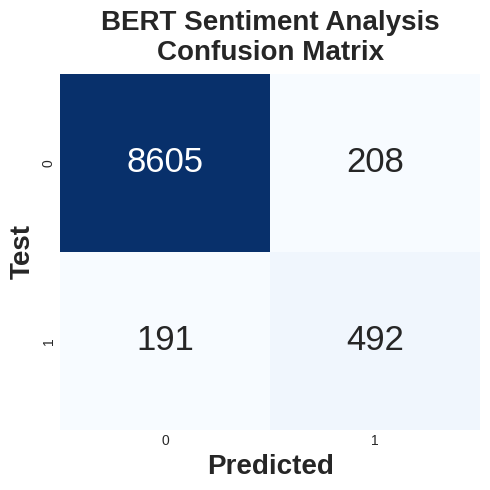

In [187]:
# Confusion matrix
conf_matrix(y_test, y_pred_bert.argmax(1),'BERT Sentiment Analysis\nConfusion Matrix')

In [189]:
from sklearn.metrics import classification_report

In [192]:
#Classification Report for BERT
print('\tClassification Report for BERT:\n\n',classification_report(y_test,y_pred_bert.argmax(1), target_names=['0', '1']))

	Classification Report for BERT:

               precision    recall  f1-score   support

           0       0.98      0.98      0.98      8813
           1       0.70      0.72      0.71       683

    accuracy                           0.96      9496
   macro avg       0.84      0.85      0.84      9496
weighted avg       0.96      0.96      0.96      9496

